# Homework - Car Fuel Efficiency

In [1]:
# import the necessary libraries
import pandas as pd
import numpy as np

### Data Preparation

In [2]:
#we'll import the data
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv

--2025-10-09 01:42:04--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv.4’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.006s  

2025-10-09 01:42:05 (140 MB/s) - ‘car_fuel_efficiency.csv.4’ saved [874188/874188]



In [3]:
df=pd.read_csv('car_fuel_efficiency.csv')

In [4]:
#let's check the first 5 rows of the dataset
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [5]:
#check the data types for each column
df.dtypes

engine_displacement      int64
num_cylinders          float64
horsepower             float64
vehicle_weight         float64
acceleration           float64
model_year               int64
origin                  object
fuel_type               object
drivetrain              object
num_doors              float64
fuel_efficiency_mpg    float64
dtype: object

In [6]:
df.dtypes == 'object'

engine_displacement    False
num_cylinders          False
horsepower             False
vehicle_weight         False
acceleration           False
model_year             False
origin                  True
fuel_type               True
drivetrain              True
num_doors              False
fuel_efficiency_mpg    False
dtype: bool

In [7]:
df.dtypes[df.dtypes == 'object']

origin        object
fuel_type     object
drivetrain    object
dtype: object

In [8]:
#to retrieve the names of columns in the dataframe that have the datatype 'object'
df.dtypes[df.dtypes == 'object'].index

Index(['origin', 'fuel_type', 'drivetrain'], dtype='object')

In [9]:
strings=list(df.dtypes[df.dtypes == 'object'].index)

In [10]:
strings

['origin', 'fuel_type', 'drivetrain']

In [11]:
#we'll convert all text in object columns to lowercase and replace spaces with underscore
for col in strings:
  df[col] = df[col].str.lower().str.replace(' ','_')

In [12]:
#quick view of the first 5 row to see if the changes is effected
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,europe,gasoline,all-wheel_drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,usa,gasoline,front-wheel_drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,europe,gasoline,front-wheel_drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,usa,diesel,all-wheel_drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,europe,gasoline,all-wheel_drive,2.0,12.488369


### Exploratory Data Analysis

In [13]:
for col in df.columns:
    print (col)
    print (df[col].head())
    print (df[col].unique()[:5])
    print (df[col].nunique())
    print ()
    

engine_displacement
0    170
1    130
2    170
3    220
4    210
Name: engine_displacement, dtype: int64
[170 130 220 210 190]
36

num_cylinders
0    3.0
1    5.0
2    NaN
3    4.0
4    1.0
Name: num_cylinders, dtype: float64
[ 3.  5. nan  4.  1.]
14

horsepower
0    159.0
1     97.0
2     78.0
3      NaN
4    140.0
Name: horsepower, dtype: float64
[159.  97.  78.  nan 140.]
192

vehicle_weight
0    3413.433759
1    3149.664934
2    3079.038997
3    2542.392402
4    3460.870990
Name: vehicle_weight, dtype: float64
[3413.43375861 3149.66493422 3079.03899737 2542.39240183 3460.87098999]
9704

acceleration
0    17.7
1    17.8
2    15.1
3    20.2
4    14.4
Name: acceleration, dtype: float64
[17.7 17.8 15.1 20.2 14.4]
162

model_year
0    2003
1    2007
2    2018
3    2009
4    2009
Name: model_year, dtype: int64
[2003 2007 2018 2009 2008]
24

origin
0    europe
1       usa
2    europe
3       usa
4    europe
Name: origin, dtype: object
['europe' 'usa' 'asia']
3

fuel_type
0    gasoline
1  

In [14]:
#columns to use
columns_to_keep= [
    'engine_displacement',
    'horsepower',
    'vehicle_weight',
    'model_year',
    'fuel_efficiency_mpg'
]

In [15]:
df_keep=df[columns_to_keep]
display (df_keep.head())

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


In [16]:
#we'll import the neccessary library
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

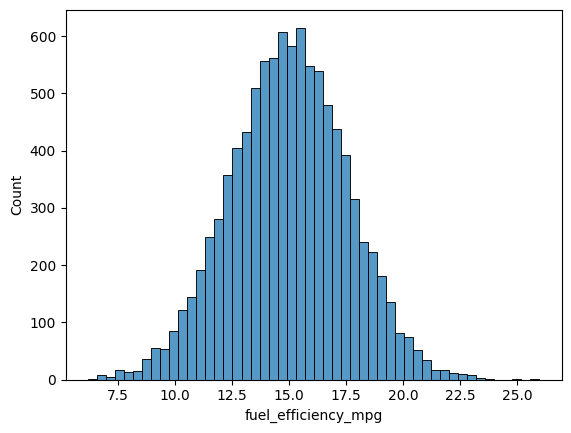

In [17]:
#visualize mpg
sns.histplot(df_keep.fuel_efficiency_mpg, bins=50)

### Q1

#check for the missing values
df_keep.info()

In [18]:
df_keep.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

- Horsepower is the column with missing values

In [19]:
df_keep.shape

(9704, 5)

In [20]:
#check for the length of our new dataframe
len(df_keep)

9704

### Q2

In [21]:
#check for description statistics
df_keep.describe()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
count,9704.000000,8996.000000,9704.000000,9704.000000,9704.000000
mean,199.708368,149.657292,3001.280993,2011.484027,14.985243
std,49.455319,29.879555,497.894860,6.659808,2.556468
min,10.000000,37.000000,952.681761,2000.000000,6.200971
25%,170.000000,130.000000,2666.248985,2006.000000,13.267459
50%,200.000000,149.000000,2993.226296,2012.000000,15.006037
75%,230.000000,170.000000,3334.957039,2017.000000,16.707965
max,380.000000,271.000000,4739.077089,2023.000000,25.967222


In [22]:
median_hp=df_keep['horsepower'].median()

In [23]:
print (f"The median (5th percentile) of horsepower is: {median_hp}")

The median (5th percentile) of horsepower is: 149.0


### Setting up the validation framework

In [24]:
n = len(df_keep)

#let's split size of the dataset into validation, test and train datasets
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = int(n*0.6)

In [25]:
n, n_val, n_test, n_train

(9704, 1940, 1940, 5822)

- this doesn't add up to the whole, so we'll calculate n_train in another way

In [26]:
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - n_val - n_test

In [27]:
n, n_val + n_test + n_train

(9704, 9704)

- this result is total sum of the whole datasets

In [28]:
#shuffling that dataset, because the initial data is present
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

df_shuffled = df_keep.iloc[idx]

In [29]:
#split the dataset into 3 parts. copy creates independent copies, so changes to one set doesn't affect the others
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

#let's check first 5 rows of df_train
df_train.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
483,220,144.0,2535.887591,2009,16.642943
7506,160,141.0,2741.170484,2019,16.298377
8795,230,155.0,2471.880237,2017,18.591822
1688,150,206.0,3748.164469,2015,11.818843
6217,300,111.0,2135.716359,2006,19.402209


In [30]:
#length of the datasets we just splited
len(df_train), len(df_val), len(df_test)

(5824, 1940, 1940)

In [31]:
#we need to reset the index. This resets the dataframe index to a clean sequential range and drops the old index
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

#quick view of the first 5 rows
df_train.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,220,144.0,2535.887591,2009,16.642943
1,160,141.0,2741.170484,2019,16.298377
2,230,155.0,2471.880237,2017,18.591822
3,150,206.0,3748.164469,2015,11.818843
4,300,111.0,2135.716359,2006,19.402209


In [32]:
#we'll separate the target variable (y) from the features (x)
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

#this will remove target from the feature dataframes
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

### Linear Regression

In [33]:
#let's retrieve the 11th row from training dataset
df_train.iloc[10]

engine_displacement     240.000000
horsepower              159.000000
vehicle_weight         2916.987921
model_year             2001.000000
Name: 10, dtype: float64

### Q3 Fill NA Mean vs Zero

In [34]:
# let's implement linear regression from scratch using the mathematical formula (normal equation) instead of using a library like scikit-learn
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

def prepare_X(df, fillna_value):
    df = df.fillna(fillna_value)
    X = df.values #converts to numpy array for mathematical operations
    return X

In [35]:
#trains model using normal equation
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

def prepare_X(df_keep, fillna_value):
    df_keep = df_keep.fillna(fillna_value)
    X = df_keep.values
    return X

### Root Mean Squared Error

In [36]:
def rmse (y, y_pred):
    error = y-y_pred #calculate the difference between actual values (y) and predicted values (y_pred)
    mse = (error**2).mean() #squares each error
    return np.sqrt(mse)

In [37]:
def prepare_X(df, fillna_value=0):
    df = df.copy()
    df = df.fillna(fillna_value)  # Fill all NaNs
    
    # Select your features
    features = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']  # adjust to your features
    X = df[features].values
    
    return X

In [38]:
#training and evaluating a linear regression model
#Replace with Mean
mean = df_train.horsepower.mean()

X_train = prepare_X(df_train, fillna_value = mean) #fill missing values in training data with the mean
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val, fillna_value = mean) #prepare validation data using the same mean from training
y_pred = w0 + X_val.dot(w) #makes prediction using linear regression formula

rmse_mean = round(rmse(y_val, y_pred), 2) #calculate RMSE and rounds to 2 decimal places
print (f"RMSE when filling with mean: {rmse_mean}")

RMSE when filling with mean: 0.46


In [39]:
#Replace with zero
X_train = prepare_X(df_train, fillna_value = 0) #fill missing values in training data with zero
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val, fillna_value = 0) #prepare validation data using the same zero from training
y_pred = w0 + X_val.dot(w) #makes prediction using linear regression formula

rmse_mean = round(rmse(y_val, y_pred), 2) #calculate RMSE and rounds to 2 decimal places
print (f"RMSE when filling with mean: {rmse_mean}")

RMSE when filling with mean: 0.52


### Q4 Best regularization

In [40]:
#linear regression with regularization
def train_linear_regression_reg(X, y, r=0.0):
    ones=np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r*np.eye(XTX.shape[0]) #creates a regularization matrix
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [41]:
def prepare_X(df_keep):
    df_num = df_keep.copy()
    return df_num.fillna(0).values

for r in [0, 0.01, 1, 10, 100]: #5 different regularization values
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w0 + X_val.dot(w)
    rmse_val = rmse(y_val, y_pred)
    print (r, rmse_val)

0 0.5173782638857467
0.01 0.5171115525767522
1 0.5222348802092772
10 0.5229812979636581
100 0.5230636233819926


### Q5 RMSE Standard Deviation

In [42]:
import numpy as np

# Step 1: Define prepare_X function
def prepare_X(df, fillna_value=0):
    df_num = df.fillna(fillna_value)
    return df_num.values

# Step 2: Define the calculate_rmse_for_seed function
def calculate_rmse_for_seed(seed, df):
    n = len(df)
    # Split datasets by 60%/20%/20%
    n_val = int(0.2*n)
    n_test = int(0.2*n)
    n_train = n - n_val - n_test
    
    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)
    
    df_shuffled = df.iloc[idx]
    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()
    
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    y_train = df_train.fuel_efficiency_mpg.values
    y_val = df_val.fuel_efficiency_mpg.values
    y_test = df_test.fuel_efficiency_mpg.values
    
    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']
    
    # Prepare data (fill with 0)
    X_train = prepare_X(df_train, fillna_value=0)
    X_val = prepare_X(df_val, fillna_value=0)
    
    # Train model (no regularization)
    w0, w = train_linear_regression(X_train, y_train)
    
    # Predict and calculate RMSE
    y_pred = w0 + X_val.dot(w)
    result = rmse(y_val, y_pred)
    
    return result

# Step 3: Run the loop
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_scores = []

for seed in seeds:
    rmse_score = calculate_rmse_for_seed(seed, df)
    rmse_scores.append(rmse_score)
    print(f'Seed {seed}, RMSE: {rmse_score:.3f}')

# Step 4: Calculate standard deviation
std = np.std(rmse_scores)
print(f'\nStandard deviation: {round(std, 3)}')

TypeError: can't multiply sequence by non-int of type 'float'